In [ ]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [ ]:
import keras
keras.__version__

'2.5.0'

In [2]:
!nvidia-smi

Wed Aug  4 10:24:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

 we want tensorflow 2.2.0 and keras==2.3.1

In [1]:
pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2 MB 4.2 kB/s 
     |████████████████████████████████| 2.9 MB 30.4 MB/s 
     |████████████████████████████████| 3.0 MB 27.6 MB/s 
     |████████████████████████████████| 454 kB 48.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.0
    Uninstalli

In [3]:
pip install keras==2.3.1

     |████████████████████████████████| 377 kB 3.9 MB/s 
     |████████████████████████████████| 50 kB 4.7 MB/s 
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
cd '/content/drive/MyDrive/stage orange/Plant_leave_diseases_dataset_without_augmentation/tomato'

/content/drive/MyDrive/stage orange/Plant_leave_diseases_dataset_without_augmentation/tomato


In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception

from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [8]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/stage orange/Plant_leave_diseases_dataset_without_augmentation/tomato/train'
valid_path = '/content/drive/MyDrive/stage orange/Plant_leave_diseases_dataset_without_augmentation/tomato/test'

In [9]:

# Here we will be using imagenet weights

xcept = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

83689472/83683744 [==============================] - 1s 0us/step


In [10]:

# don't train existing weights
for layer in xcept.layers:
    layer.trainable = False

In [13]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/stage orange/Plant_leave_diseases_dataset_without_augmentation/tomato/train/*')

In [11]:
# our layers - you can add more if you want
x = Flatten()(xcept.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=xcept.input, outputs=prediction)

In [15]:

# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/stage orange/Plant_leave_diseases_dataset_without_augmentation/tomato/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 9403 images belonging to 10 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/stage orange/Plant_leave_diseases_dataset_without_augmentation/tomato/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2285 images belonging to 10 classes.


In [24]:
# fit the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)  
)

Epoch 1/20
294/294 [==============================] - 179s 607ms/step - loss: 1.3574 - accuracy: 0.8553 - val_loss: 9.6498 - val_accuracy: 0.7068
Epoch 2/20
294/294 [==============================] - 180s 611ms/step - loss: 1.2348 - accuracy: 0.8684 - val_loss: 9.6742 - val_accuracy: 0.7484
Epoch 3/20
294/294 [==============================] - 180s 612ms/step - loss: 1.1774 - accuracy: 0.8794 - val_loss: 11.7081 - val_accuracy: 0.7475
Epoch 4/20
294/294 [==============================] - 176s 597ms/step - loss: 1.2013 - accuracy: 0.8811 - val_loss: 10.5983 - val_accuracy: 0.7190
Epoch 5/20
294/294 [==============================] - 176s 597ms/step - loss: 1.0268 - accuracy: 0.8947 - val_loss: 11.6861 - val_accuracy: 0.7484
Epoch 6/20
294/294 [==============================] - 175s 595ms/step - loss: 1.1530 - accuracy: 0.8933 - val_loss: 12.5627 - val_accuracy: 0.7418
Epoch 7/20
294/294 [==============================] - 176s 598ms/step - loss: 1.0139 - accuracy: 0.9012 - val_loss: 14.9

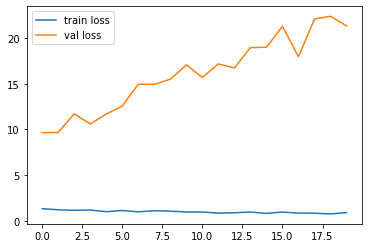

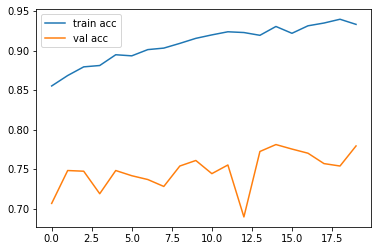

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:

from tensorflow.keras.models import load_model

model.save('model_Xception.h5')

In [27]:
y_pred = model.predict(test_set)
y_pred

array([[6.21085906e-27, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99840617e-01, 3.78667290e-20, 1.66222009e-20, ...,
        2.46935042e-21, 0.00000000e+00, 1.19800697e-11],
       [0.00000000e+00, 9.22661185e-37, 6.35168404e-31, ...,
        1.39804895e-33, 0.00000000e+00, 3.99241728e-20],
       ...,
       [3.18811942e-07, 1.46884929e-07, 2.08479244e-28, ...,
        1.80107200e-23, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 8.39533030e-08, 7.89963683e-25, ...,
        0.00000000e+00, 0.00000000e+00, 1.80882207e-08]], dtype=float32)

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [33]:
model=load_model('model_Xception.h5')


In [64]:
img=image.load_img('/content/drive/MyDrive/stage orange/Plant_leave_diseases_dataset_without_augmentation/tomato/train/Tomato___Bacterial_spot/image (1023).JPG',target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)
if a[0]==0:
  predict= 'Tomato___Bacterial_spot'
elif a[0]==2:
  predict= "Tomato___Early_blight"
elif a[0]==1:
  predict= 'Tomato___Late_blight'
elif a[0]==3:
  predict= "Tomato___Leaf_Mold"
  if a[0]==0:
  predict= 'Tomato___Septoria_leaf_spot'
elif a[0]==2:
  predict= "Tomato___Spider_mites Two-spotted_spider_mite"
elif a[0]==1:
  predict= 'Tomato___Target_Spot'
elif a[0]==2:
  predict= "Tomato___Tomato_Yellow_Leaf_Curl_Virus"
elif a[0]==1:
  predict= 'Tomato___Tomato_mosaic_virus'
elif a[0]==3:
  predict= "Tomato___healthy"

array([0])

In [74]:
def predict_image(file_path):
  img=image.load_img(file_path,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  img_data=preprocess_input(x)
  model.predict(img_data)
  a=np.argmax(model.predict(img_data), axis=1)
  if a[0]==0:
    predict= 'Tomato___Bacterial_spot'
  elif a[0]==1:
    predict= "Tomato___Early_blight"
  elif a[0]==2:
    predict= 'Tomato___Late_blight'
  elif a[0]==3:
    predict= "Tomato___Leaf_Mold"
  elif a[0]==4:
    predict='Tomato___Septoria_leaf_spot'
  elif a[0]==5:
    predict= "Tomato___Spider_mites Two-spotted_spider_mite"
  elif a[0]==6:
    predict= 'Tomato___Target_Spot'
  elif a[0]==7:
    predict= "Tomato___Tomato_Yellow_Leaf_Curl_Virus"
  elif a[0]==8:
    predict= 'Tomato___Tomato_mosaic_virus'
  elif a[0]==9:
    predict= "Tomato___healthy"

  return predict

In [75]:
predict_image('/content/drive/MyDrive/stage orange/Plant_leave_diseases_dataset_without_augmentation/tomato/train/Tomato___Target_Spot/image (1000).JPG')

'Tomato___Target_Spot'